# Basics of logistic regression

## Import the relevant librairies

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [3]:
raw_data = pd.read_csv('2.01. Admittance.csv')

In [4]:
raw_data

SAT Admitted
0    1363       No
1    1792      Yes
2    1954      Yes
3    1653       No
4    1593       No
..    ...      ...
163  1722      Yes
164  1750      Yes
165  1555       No
166  1524       No
167  1461       No

[168 rows x 2 columns]

In [5]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1 ,'No':0})
data

SAT  Admitted
0    1363         0
1    1792         1
2    1954         1
3    1653         0
4    1593         0
..    ...       ...
163  1722         1
164  1750         1
165  1555         0
166  1524         0
167  1461         0

[168 rows x 2 columns]

## Variables 

In [6]:
y = data['Admitted']
x1 = data['SAT']

## Let's plot the data

### Scatter plot

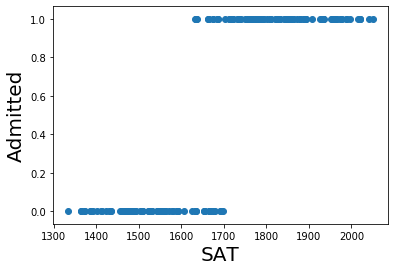

In [7]:
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

### Plot with linear regression

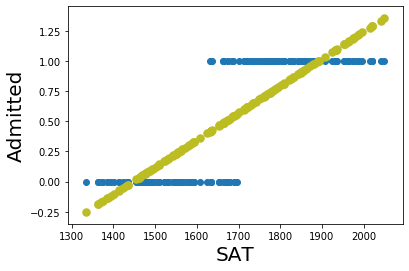

In [12]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y, x)
result_lign = reg_lin.fit()

plt.scatter(x1, y, color='C0')
y_hat = x1*result_lign.params[1] + result_lign.params[0]

plt.scatter(x1, y_hat, lw=2.5, color='C8')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()
#result_lign.summary()

### Plot with logistic regression cuve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


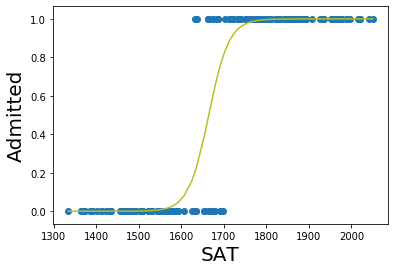

In [13]:
#x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
result_log = reg_log.fit()

def fonction(x, b0, b1):
    return np.array(np.exp(b0 + x*b1)/ (1 + np.exp(b0 + x*b1)))

f_sorted = np.sort(fonction(x1, result_log.params[0], result_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)

plt.plot(x_sorted, f_sorted, color='C8')
plt.show()

## Declare the dependent and the independent variables

In [14]:
y = data['Admitted']
x1 = data['SAT']

### Regression

In [15]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
result_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


### Summary

In [16]:
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 01 Jan 2020   Pseudo R-squ.:                  0.7992
Time:                        20:44:59   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Exploitation de la table de resumé

#### MLE: Maximum likelihood extimation (fonction de vraisemblance)

C'est une fonction qui estime la probabilité que le modèle en lui même décrive la relation sous-jacente réelle entre les variables. en d'autres termes, plusla vraisemblance est grande plus la probabilité que notre modèle soit correct.

#### Log-Likeligood (valeur presque toujours négative 

### Examination et interprétation des coefficients 

SAT - admittance regression
log(pi/(1-pi) = -69.91 + 0,042*SAT
#### pi = probabilité qu'un événement se produise et 1 - pi = l'événement ne se produit pas,  log(pi/(1-pi) ==> odds



### Accuracy

In [17]:
cm_df = pd.DataFrame(result_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_df # matrice de confusion 

Predicted 0  Predicted 1
Actual 0         67.0          7.0
Actual 1          7.0         87.0

In [18]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0] + cm[1,1])/cm.sum()
print(cm[0,0])
print(cm[1,1])
accuracy_train # soit une précision de 91.6%

67.0
87.0


0.9166666666666666